In [1]:
# If having a problem when importing matplotlib, execute pip install msvc-runtime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras.utils.vis_utils import plot_model

# generate data
X, y = datasets.make_classification(n_samples=10000, n_features=50, n_redundant=10, n_informative=10,
                           random_state=1, n_clusters_per_class=2,n_classes=3, class_sep=2)
                           
# divide data in Train - Validation - Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_tr, X_valid, y_tr, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

# Standardize Data
sc = StandardScaler()
X_tr_std = sc.fit_transform(X_tr)
X_valid_std = sc.transform(X_valid)
X_test_std = sc.transform(X_test)

In [2]:
### CONSTANTS

INPUT_SHAPE = 50
LATENT_SHAPE = 5

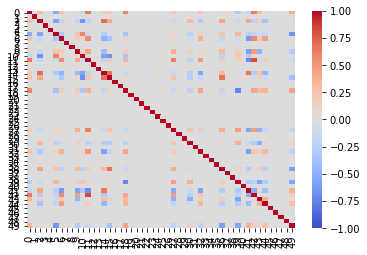

In [3]:
# calculate the correlation matrix
corr = pd.DataFrame(X_train).corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap='coolwarm',
        vmin=-1, vmax=1, center= 0)

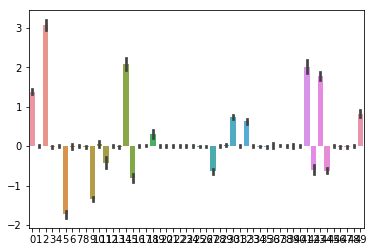

In [4]:
ax = sns.barplot(data=X_train)

In [16]:
encoder = keras.models.Sequential([
    keras.layers.Dense(LATENT_SHAPE, input_shape=[INPUT_SHAPE]),
])

decoder = keras.models.Sequential([
    keras.layers.Dense(INPUT_SHAPE, input_shape=[LATENT_SHAPE]),
])

autoencoder = keras.models.Sequential([encoder, decoder])
autoencoder.compile(loss='mse', optimizer = keras.optimizers.SGD(learning_rate=0.1), metrics=['accuracy'])

history = autoencoder.fit(X_tr_std,X_tr_std, epochs=100, validation_data=(X_valid_std, X_valid_std),
                         callbacks=[keras.callbacks.EarlyStopping(patience=10)])
                         
codings = encoder.predict(X_tr_std)

Epoch 1/100
175/175 [==============================] - 1s 1ms/step - loss: 0.9598 - accuracy: 0.0388 - val_loss: 0.8303 - val_accuracy: 0.0579
Epoch 2/100
175/175 [==============================] - 0s 904us/step - loss: 0.7860 - accuracy: 0.0737 - val_loss: 0.7405 - val_accuracy: 0.0871
Epoch 3/100
175/175 [==============================] - 0s 961us/step - loss: 0.7280 - accuracy: 0.1030 - val_loss: 0.7075 - val_accuracy: 0.1086
Epoch 4/100
175/175 [==============================] - 0s 1ms/step - loss: 0.7084 - accuracy: 0.1145 - val_loss: 0.6961 - val_accuracy: 0.1186
Epoch 5/100
175/175 [==============================] - 0s 988us/step - loss: 0.6994 - accuracy: 0.1198 - val_loss: 0.6899 - val_accuracy: 0.1193
Epoch 6/100
175/175 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.1243 - val_loss: 0.6868 - val_accuracy: 0.1221
Epoch 7/100
175/175 [==============================] - 0s 997us/step - loss: 0.6913 - accuracy: 0.1261 - val_loss: 0.6850 - val_accuracy

In [17]:
# List all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


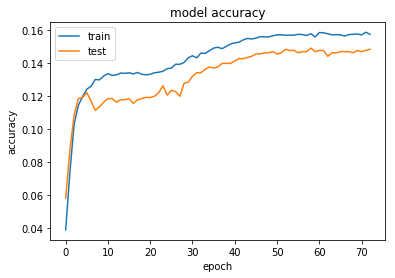

In [18]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

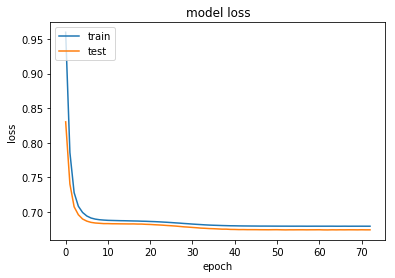

In [19]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
print(autoencoder.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_9 (Sequential)    (None, 5)                 255       
_________________________________________________________________
sequential_10 (Sequential)   (None, 50)                300       
Total params: 555
Trainable params: 555
Non-trainable params: 0
_________________________________________________________________
None


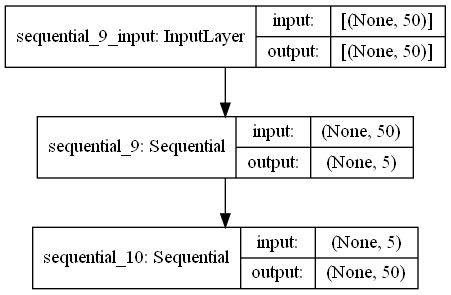

In [21]:
# Plot the model
tf.keras.utils.plot_model(
    autoencoder, to_file='model.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)